<a href="https://colab.research.google.com/github/2018141043089/2018141043089.github.io/blob/master/week2/BJ_Week_2_COMM_599.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BJ' notebook week2

obtain data:
1. python package
2. API call
3. read csv
4. scrap
5. CSS style


In [ ]:
%pip install tabulate==0.9.0
%pip install bigframes==1.19.0

In [ ]:
%pip install jedi>=0.16
%pip install decorator<5.0

/bin/bash: line 1: 5.0: No such file or directory


In [ ]:
%pip install requests bs4 wbdata

In [ ]:
%load_ext rpy2.ipython

##Week 2 -  Getting setup and getting your data.

###Setup

Welcome to week two of COMM 599. The technical half of this week's class is focused on two main parts, getting you set up to submit assigments and code to the class repository and going over some of the ways that you can get data.

Let's start by creating a Python or R notebook for you to write your code in.

You can make a Python Colab by clicking [here ](https://colab.research.google.com/) or an R notebook by clicking [here](https://colab.research.google.com/notebook#create=true&language=r).

Open a new notebook and let's create a simple `Hello World` program to demonstrate how to run code in this environment. Rename your notebook to `Hello World - {your USC username}` and insert a cell that prints the text "Hello World" in Python this would look like this.




In [ ]:
output = "Hello World"
print(output)

Hello World


And in R it would be. We can run R and python in the same notebook byh using the `%%R` cell magic or `%R` line magic command to tell the interpreter to expect R code.

In [ ]:
%%R

r_output <- "Hello World (in R)!"
print(r_output)

[1] "Hello World (in R)!"


Now let's head to github. If you have not already make a github account using your USC email. You should have an invitation to join the COMM-599 Fall 2023 repository. This is a private repository that is only visible to other members of the class.


The repository is how you will submit assignments, code and slides. Code should be as a raw .py or .R file or a notebook file. Images and visualizations should be uploaded as .png files if possible. Dashboards and more complex visualizations should be bundled with their source data into one file. Finally slide decks also need to be added to the repo either as a .pdf snapshot of the deck.


Once logged into github and are in the org go to your hello world file and select Save a Copy to Github.


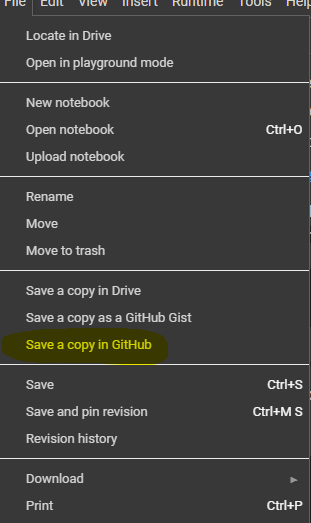


From there create a branch off of main with your USC username and the flag week 2 and commit your code to a folder under your usc username with the subfolder week 2.

So for me it would be

/main/joshuaac/week2/hello_world.ipynb

Once the code is committed create a pull request and tag your reviewer in it. After the approve merge your branch into main.


---

## Getting Data


For the back half of the class let's demonstrate some of the various ways that you can get or use data.


***Method 1 - Pre Structured Data Sources***


Major organizations such as the UN or World Bank make their data available through well structured APIs, many of which have a package associated with them.


Using these data sources is simply a matter of finding the library and reading the documentation. Unfortunately they are sometimes rather arcane and bespoke but usually will give access to powerful data.



In [ ]:
import wbdata
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
sns.set(rc={'figure.figsize':(16.,12.)})

In [ ]:
%pip install --upgrade wbdata

In [ ]:
print(dir(wbdata))  # Lists all functions and properties in the wbdata module

['Client', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'cache', 'client', 'dates', 'fetcher', 'get_countries', 'get_data', 'get_dataframe', 'get_default_client', 'get_incomelevels', 'get_indicators', 'get_lendingtypes', 'get_series', 'get_sources', 'get_topics']


In [ ]:
countries = wbdata.get_countries()

In [ ]:
indicators = wbdata.get_indicators()
print(type(indicators))
inflation_indicators = [(indicator['id'], indicator['name']) for indicator in indicators if 'inflation' in indicator['name'].lower()]
df = pd.DataFrame(inflation_indicators, columns=["id", "name"])
print(df)

<class 'wbdata.client.SearchResult'>
                     id                                               name
0        FP.CPI.TOTL.ZG              Inflation, consumer prices (annual %)
1        FP.FPI.TOTL.ZG                  Inflation, food prices (annual %)
2        FP.WPI.TOTL.ZG             Inflation, wholesale prices (annual %)
3     NY.GDP.DEFL.87.ZG                 Inflation, GDP deflator (annual %)
4     NY.GDP.DEFL.KD.ZG                 Inflation, GDP deflator (annual %)
5  NY.GDP.DEFL.KD.ZG.AD  Inflation, GDP deflator: linked series (annual %)


In [ ]:
markets =["CAN", "USA"] #USA and Canada

variables_of_interest = {
            "FP.CPI.TOTL.ZG":"inflation",
            "SM.POP.NETM":"net_migration",
            "SP.DYN.LE00.IN":"life_exp",
            "SP.POP.TOTL":"total_pop",
            "SP.URB.TOTL":"urban_pop",
            "NY.GDP.PCAP.PP.KD":"gdp_pc",
            "NY.GNP.PCAP.PP.CD":'gni_pc',
        } #let's give our variables a common name

#download data from wbdata given the countries and variables listed above
df=wbdata.get_dataframe(variables_of_interest, country=markets).reset_index()
df['date'] = df['date'].map(int)

In [ ]:
df

,country,date,inflation,net_migration,life_exp,total_pop,urban_pop,gdp_pc,gni_pc
0,Canada,2023,3.879002,249746.0,NaN,40097761.0,32824829.0,55817.897428,60700.0
1,Canada,2022,6.802801,248586.0,81.295610,38939056.0,31833457.0,56872.605348,61230.0
2,Canada,2021,3.395193,195181.0,81.587073,38239864.0,31223996.0,55781.699027,55300.0
3,Canada,2020,0.717000,195181.0,81.660488,38028638.0,31016918.0,53274.910930,48240.0
4,Canada,2019,1.949269,391914.0,82.223902,37618495.0,30652302.0,56713.088877,49900.0
...,...,...,...,...,...,...,...,...,...
123,United States,1964,1.278912,501115.0,70.165854,191889000.0,137215986.0,NaN,NaN
124,United States,1963,1.239669,588381.0,69.917073,189242000.0,134615404.0,NaN,NaN
125,United States,1962,1.198773,549734.0,70.119512,186538000.0,131988693.0,NaN,NaN
126,United States,1961,1.070724,541424.0,70.270732,183691000.0,129276215.0,NaN,NaN


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='date', ylabel='inflation'>

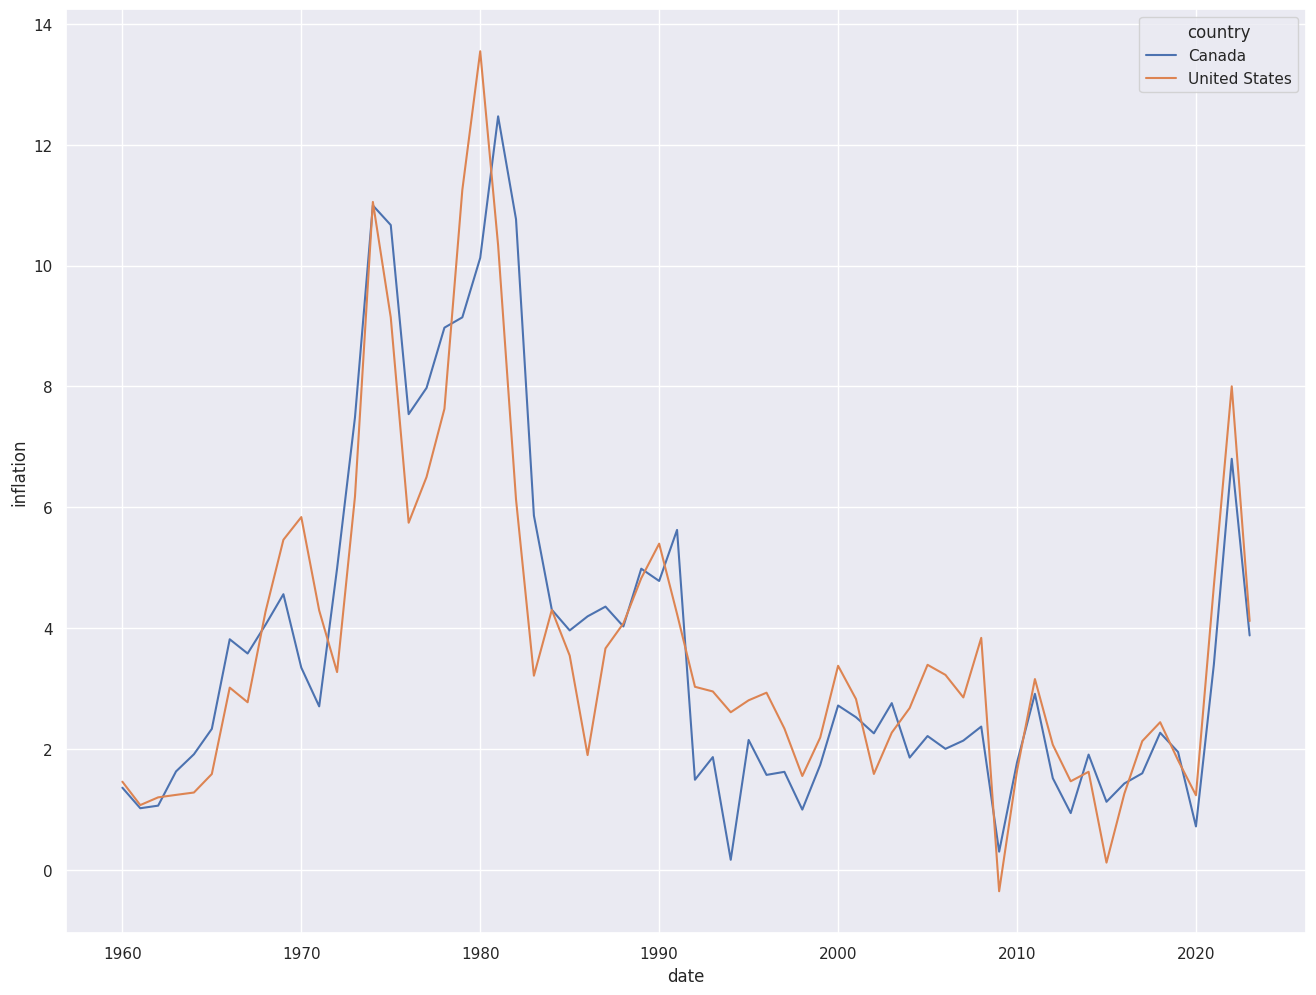

In [ ]:
sns.lineplot(data=df, x="date", y="inflation", hue = "country")  #plot inflation in the two countries.

In [ ]:
# ACTIVITY - Add your own code and call the world bank API to pull population or GDP stats from two countries of your choice and visualize.

### API Calls


Most services won't have their own bundled library to make API calls for you. Instead you will have the call the API yourself using a package like requests.


The City of LA makes a lot of data available in it's [LA Open data portal](https://data.lacity.org/). Let's call the API to download the data around 311 service request calls.





In [ ]:
import requests
import json

In [ ]:
target = "https://data.lacity.org/resource/4a4x-mna2.json"

data_311 = requests.get(target).json()

In [ ]:
df_311 = pd.DataFrame.from_dict(data_311)

In [ ]:
df_311.head(5)

,srnumber,createddate,updateddate,actiontaken,owner,requesttype,status,requestsource,createdbyuserorganization,mobileos,...,location,tbmpage,tbmcolumn,tbmrow,apc,cd,cdmember,nc,ncname,policeprecinct
0,1-3202602011,2023-01-01T00:00:46.000,2023-01-03T13:01:07.000,SR Created,LASAN,Bulky Items,Closed,Self Service,Self Service_SAN,,...,"{'type': 'Point', 'coordinates': [-118.3203053...",503,F,2,North Valley APC,7,Monica Rodriguez,10,Sunland-Tujunga,FOOTHILL
1,1-3202603151,2023-01-01T00:10:19.000,2023-01-06T20:43:59.000,SR Created,LASAN,Bulky Items,Closed,Self Service,Self Service,,...,"{'type': 'Point', 'coordinates': [-118.2981043...",633,J,1,Central APC,10,Heather Hutt,55,Wilshire Center-Koreatown,OLYMPIC
2,1-3202610701,2023-01-01T00:35:51.000,2023-01-04T13:45:56.000,SR Created,LASAN,Bulky Items,Closed,Self Service,Self Service_SAN,,...,"{'type': 'Point', 'coordinates': [-118.4071563...",532,F,6,South Valley APC,2,Paul Krekorian,21,Greater Valley Glen,NORTH HOLLYWOOD
3,1-3202605721,2023-01-01T00:36:43.000,2023-01-07T11:48:29.000,SR Created,LASAN,Metal/Household Appliances,Closed,Mobile App,Self Service,iOS,...,"{'type': 'Point', 'coordinates': [-118.3977044...",632,G,4,West Los Angeles APC,5,Katy Yaroslavsky,61,South Robertson,WEST LOS ANGELES
4,1-3202612411,2023-01-01T00:40:18.000,2023-04-06T12:50:30.000,SR Created,BSL,Single Streetlight Issue,Closed,Mobile App,Self Service,Android,...,"{'type': 'Point', 'coordinates': [-118.3755392...",632,J,6,South Los Angeles APC,10,Heather Hutt,73,Mid City,WILSHIRE


In [ ]:
by_nc = df_311.groupby('ncname').count().reset_index()

In [ ]:
by_nc

,ncname,srnumber,createddate,updateddate,actiontaken,owner,requesttype,status,requestsource,createdbyuserorganization,...,longitude,location,tbmpage,tbmcolumn,tbmrow,apc,cd,cdmember,nc,policeprecinct
0,,22,22,22,22,22,22,22,22,22,...,21,21,21,22,21,22,21,22,0,22
1,Arleta,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2,Arroyo Seco,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
3,Atwater Village,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,Bel Air-Beverly Crest,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Wilmington,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
90,Wilshire Center-Koreatown,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
91,Winnetka,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
92,Woodland Hills-Warner Center,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25


<Axes: xlabel='createddate', ylabel='ncname'>

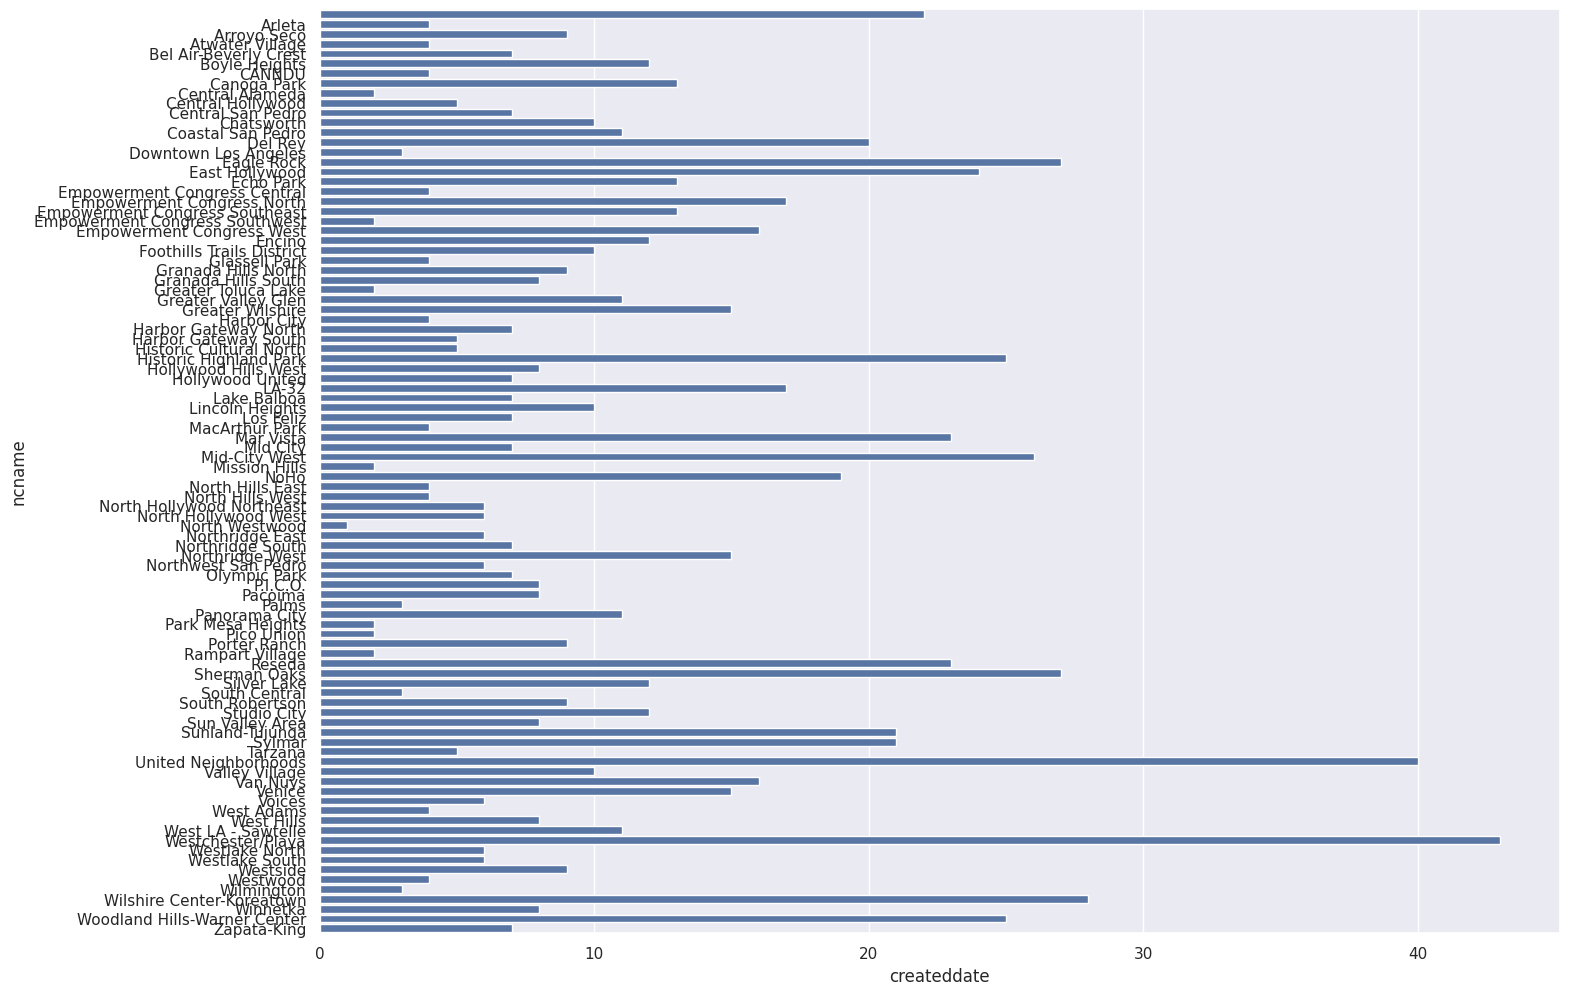

In [ ]:
sns.barplot(data=by_nc, y="ncname", x="createddate")

In [ ]:
#Some data sources will also directly expose CSV or Jsons to you which can be read via a URL

In [ ]:
covid_data = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v3/hospitalizations.csv")

In [ ]:
covid_data.tail(5)

,date,location_key,new_hospitalized_patients,cumulative_hospitalized_patients,current_hospitalized_patients,new_intensive_care_patients,cumulative_intensive_care_patients,current_intensive_care_patients,new_ventilator_patients,cumulative_ventilator_patients,current_ventilator_patients
1768480,2022-09-11,US_WY,3.0,10754.0,13.0,NaN,NaN,3.0,NaN,NaN,NaN
1768481,2022-09-12,US_WY,4.0,10758.0,16.0,NaN,NaN,3.0,NaN,NaN,NaN
1768482,2022-09-13,US_WY,7.0,10765.0,16.0,NaN,NaN,2.0,NaN,NaN,NaN
1768483,2022-09-14,US_WY,7.0,10772.0,22.0,NaN,NaN,3.0,NaN,NaN,NaN
1768484,2022-09-15,US_WY,7.0,10779.0,22.0,NaN,NaN,3.0,NaN,NaN,NaN


In [ ]:
# ACTIVITY - Head to the LA open data site and download a dataset on city services, count the number of rows or produce some form of basic data product out of it.

### Github

Some organizations will host datasets on Github. You can either request of fork the dataset into your own repo or read the file directly from the raws. As an example here is polling data from [538](https://github.com/fivethirtyeight/data)


In [ ]:
polling = pd.read_csv('https://projects.fivethirtyeight.com/polls-page/data/president_primary_polls.csv')

<ipython-input-82-0bd1c69b42f3>:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  polling = pd.read_csv('https://projects.fivethirtyeight.com/polls-page/data/president_primary_polls.csv')


In [ ]:
vivek= polling[polling['candidate_name'] == 'Vivek G. Ramaswamy']
vivek['dt'] = pd.to_datetime(vivek['start_date'])

<ipython-input-83-f16e90781bb0>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vivek['dt'] = pd.to_datetime(vivek['start_date'])
<ipython-input-83-f16e90781bb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vivek['dt'] = pd.to_datetime(vivek['start_date'])


In [ ]:
vivek

,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,numeric_grade,pollscore,...,stage,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,party,answer,candidate_id,candidate_name,pct,dt
117,86562,1416,HarrisX,2097,Forbes,HarrisX,133,Harris Insights & Analytics,1.5,-0.1,...,primary,False,False,NaN,REP,Ramaswamy,30966,Vivek G. Ramaswamy,12.0,2024-03-25
263,86240,1363,UC Berkeley,300,LA Times,University of California Berkeley Institute of...,457,University of California Berkeley Institute of...,2.5,-0.2,...,primary,False,False,NaN,REP,Ramaswamy,30966,Vivek G. Ramaswamy,1.0,2024-02-22
297,86221,1447,Civiqs,618,Northwest Progressive Institute,Civiqs,471,Civiqs,2.4,-0.2,...,primary,False,False,NaN,REP,Ramaswamy,30966,Vivek G. Ramaswamy,1.0,2024-02-20
303,86251,217,High Point University,NaN,NaN,High Point University Survey Research Center,139,High Point University Survey Research Center,2.5,-0.4,...,primary,False,False,NaN,REP,Ramaswamy,30966,Vivek G. Ramaswamy,1.0,2024-02-16
310,86251,217,High Point University,NaN,NaN,High Point University Survey Research Center,139,High Point University Survey Research Center,2.5,-0.4,...,primary,False,False,NaN,REP,Ramaswamy,30966,Vivek G. Ramaswamy,1.0,2024-02-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14765,82269,1102,Emerson,NaN,NaN,Emerson College,88,Emerson College,2.9,-1.1,...,primary,False,False,NaN,REP,Ramaswamy,30966,Vivek G. Ramaswamy,3.7,2023-02-24
14776,82273,1189,Morning Consult,NaN,NaN,Morning Consult,218,Morning Consult,1.9,-0.3,...,primary,False,False,NaN,REP,Ramaswamy,30966,Vivek G. Ramaswamy,1.0,2023-02-23
14787,83848,1189,Morning Consult,NaN,NaN,Morning Consult,218,Morning Consult,1.9,-0.3,...,primary,False,False,NaN,REP,Ramaswamy,30966,Vivek G. Ramaswamy,1.0,2023-02-22
14850,82255,294,McLaughlin,NaN,NaN,McLaughlin & Associates,203,McLaughlin & Associates,0.5,1.6,...,primary,False,False,NaN,REP,Ramaswamy,30966,Vivek G. Ramaswamy,1.0,2023-02-17


<Axes: xlabel='dt', ylabel='pct'>

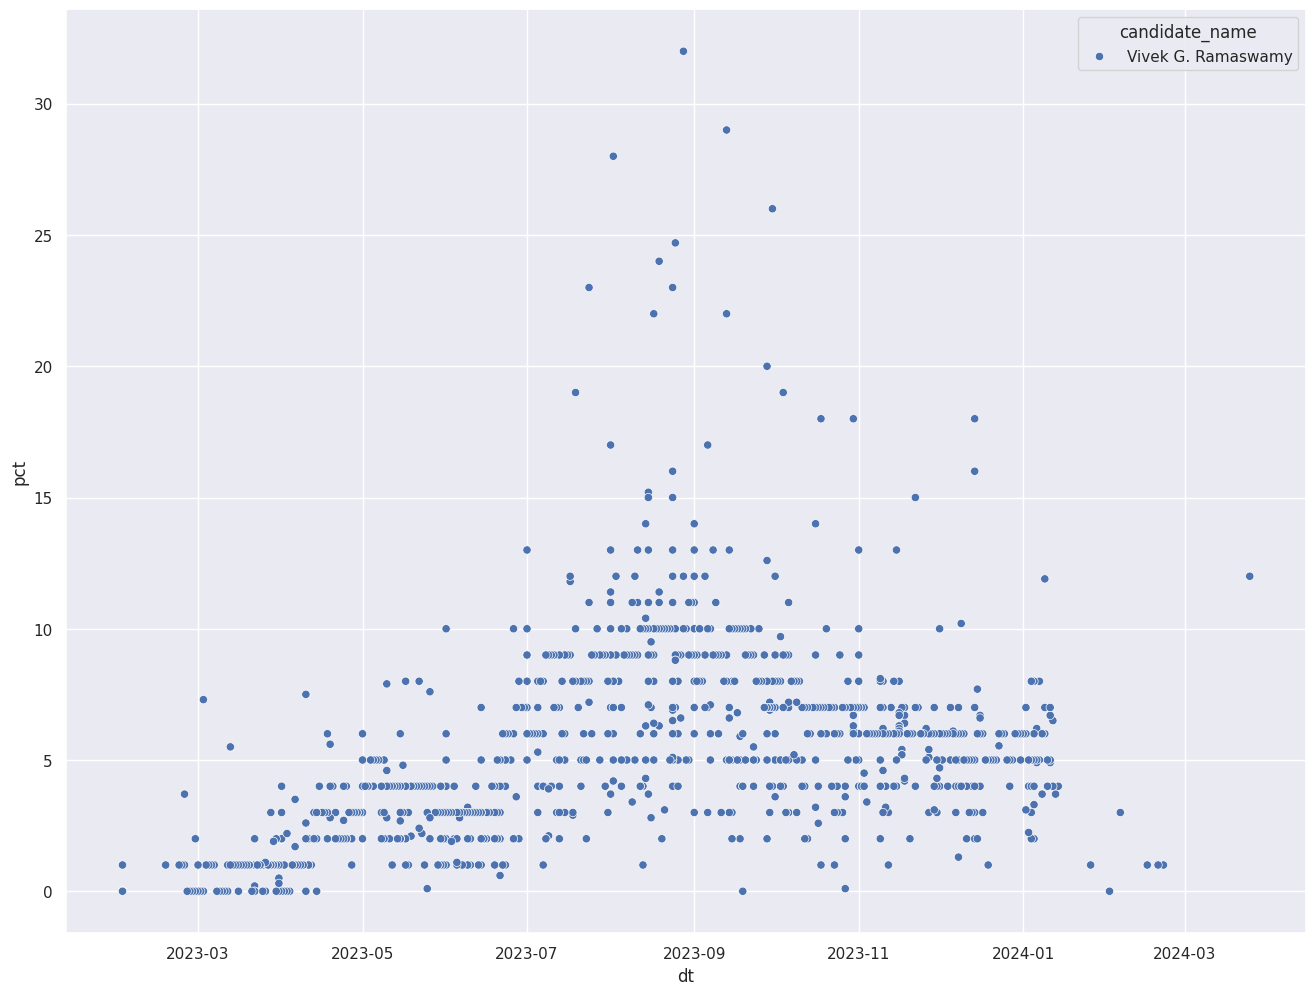

In [ ]:
sns.scatterplot(vivek, x = 'dt', y  = 'pct', hue = 'candidate_name')

### Scraping

Sometimes a data source won't have an API or library for you to call. In this case we need to scrape the website. This is generally fair game if the data is not behind a login or paywall but be mindful of how much you scrape.

Structured data is easy to scrape just using pandas.

In [ ]:
top_charts = pd.read_html('https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number-one_singles_of_the_2020s')

In [ ]:
top_by_time = top_charts[2] #get the third table

In [ ]:
top_by_time

,key,date,artist,song,weeks_at_1,refernce,trash
0,1096,"January 18, 2020",Roddy Ricch,"""The Box""",11,[5],NaN
1,1097,"April 4, 2020",The Weeknd,"""Blinding Lights"" ♪ [6]",4,[7],NaN
2,1098,"April 18, 2020",Drake,"""Toosie Slide""",1,[8],NaN
3,1099,"May 9, 2020",The Scotts (Travis Scott and Kid Cudi),"""The Scotts""",1,[9],NaN
4,1100,"May 16, 2020",Doja Cat featuring Nicki Minaj,"""Say So""",1,[10],NaN
...,...,...,...,...,...,...,...
82,1170,"May 4, 2024",Taylor Swift featuring Post Malone,"""Fortnight""",2,[86],NaN
83,1171,"May 18, 2024",Kendrick Lamar,"""Not Like Us""",2,[87],NaN
84,1172,"May 25, 2024",Post Malone featuring Morgan Wallen,"""I Had Some Help""",6,[88],NaN
85,1173,"June 29, 2024",Sabrina Carpenter,"""Please Please Please""",1,[89],NaN


In [ ]:
top_by_time.head(2)

,key,date,artist,song,weeks_at_1,refernce,trash
0,1096,"January 18, 2020",Roddy Ricch,"""The Box""",11,[5],NaN
1,1097,"April 4, 2020",The Weeknd,"""Blinding Lights"" ♪ [6]",4,[7],NaN


In [ ]:
top_by_time.columns = ['key', 'date', 'artist', 'song', 'weeks_at_1', 'refernce', 'trash']

In [ ]:
top_by_time.groupby('artist').count()['key']

,key
artist,
2021,1
2022,1
2023,1
2024,1
24kGoldn featuring Iann Dior,1
...,...
The Weeknd,1
The Weeknd and Ariana Grande,2
Travis Scott featuring Young Thug and M.I.A.,1


In [ ]:
from bs4 import BeautifulSoup

Unstructured data needs to be selected using CSS style markers. The easiest way to do this is by using the [Selector Gadget](https://chrome.google.com/webstore/detail/selectorgadget/mhjhnkcfbdhnjickkkdbjoemdmbfginb) extension. This will highlight the CSS flags that identify a piece of content. This can be fed into a scraper to return the data.

In [ ]:
url = "https://www.boxofficemojo.com/year/?area=XWW"
response = requests.get(url)
parser = BeautifulSoup(response.text)

In [ ]:
titles = parser.select(".mojo-cell-wide")
top_movie_titles = [str(x.string) for x in titles]
top_movie_titles

[]

In [ ]:
revenue = parser.select(".mojo-sort-column+ .mojo-field-type-money")
top_movie_revenue = [str(x.string) for x in revenue]
top_movie_revenue

In [ ]:
year = parser.select(".mojo-sort-column")
movie_year = [str(x.string) for x in year]
movie_year

[]

In [ ]:
revenue_data = pd.DataFrame({'year' : movie_year, 'title' : top_movie_titles, 'revenue' : top_movie_revenue})
clean_rev = revenue_data.loc[revenue_data['revenue'] != 'None'].copy()
clean_rev['revenue'] = clean_rev['revenue'].replace("[$,]", "", regex=True).map(int)
clean_rev['year'] = clean_rev['year'].map(int)

<Axes: xlabel='year', ylabel='revenue'>

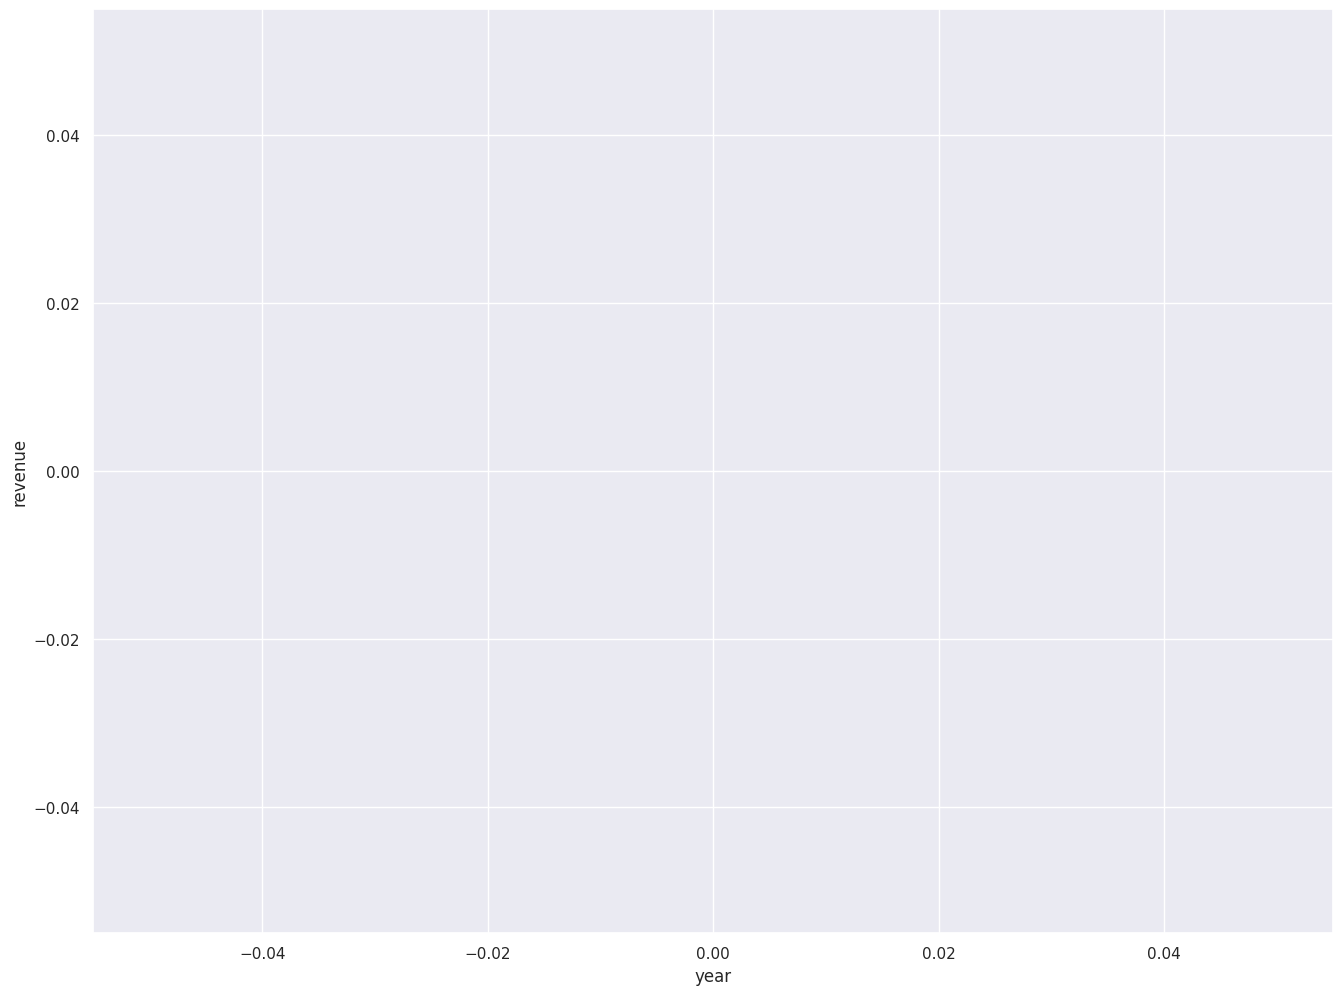

In [ ]:
sns.lineplot(clean_rev, x = 'year', y = 'revenue')

Scraping is a gigantic pain in the butt compared to other methods. Suggest using alternatives when possible

In [ ]:
#Activity - Work with the rest of the class to build a compilation of known data sources and how to access them